Analytic: R^2=-0.0018897375285067408, MSE=81.58231743908226
Gradient Descent: R^2=-0.001889737528507185, MSE=81.58231743908229
Stochastic Gradient Descent: R^2=0.42309247204814904, MSE=46.97667948417824


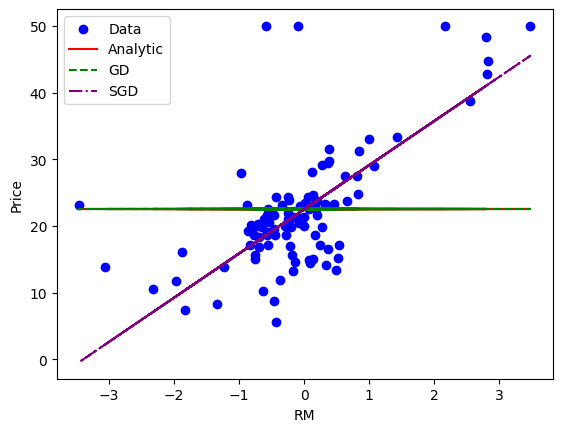

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

X = df[['rm']].values
y = df['medv'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

X_train_mean = np.mean(X_train)
y_train_mean = np.mean(y_train)
numerator = np.sum((X_train - X_train_mean) * (y_train - y_train_mean))
denominator = np.sum((X_train - X_train_mean) ** 2)
beta_1 = numerator / denominator
beta_0 = y_train_mean - beta_1 * X_train_mean
y_pred_analytic = beta_0 + beta_1 * X_test
r2_analytic = r2_score(y_test, y_pred_analytic)
mse_analytic = mean_squared_error(y_test, y_pred_analytic)

beta_0_gd = 0
beta_1_gd = 0
alpha = 0.001
epochs = 10000
N = len(X_train)

for epoch in range(epochs):
    y_pred_gd = beta_0_gd + beta_1_gd * X_train
    error = y_pred_gd - y_train
    beta_0_gd -= alpha * (1/N) * np.sum(error)
    beta_1_gd -= alpha * (1/N) * np.sum(error * X_train)

y_pred_gd = beta_0_gd + beta_1_gd * X_test
r2_gd = r2_score(y_test, y_pred_gd)
mse_gd = mean_squared_error(y_test, y_pred_gd)

beta_0_sgd = 0
beta_1_sgd = 0
epochs_sgd = 1000

for epoch in range(epochs_sgd):
    for i in range(N):
        y_pred_sgd = beta_0_sgd + beta_1_sgd * X_train[i]
        error_sgd = y_pred_sgd - y_train[i]
        beta_0_sgd -= alpha * error_sgd
        beta_1_sgd -= alpha * error_sgd * X_train[i]

y_pred_sgd = beta_0_sgd + beta_1_sgd * X_test
r2_sgd = r2_score(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

print(f'Analytic: R^2={r2_analytic}, MSE={mse_analytic}')
print(f'Gradient Descent: R^2={r2_gd}, MSE={mse_gd}')
print(f'Stochastic Gradient Descent: R^2={r2_sgd}, MSE={mse_sgd}')

plt.scatter(X_test, y_test, color='blue', label='Data')
plt.plot(X_test, y_pred_analytic, color='red', label='Analytic')
plt.plot(X_test, y_pred_gd, color='green', linestyle='--', label='GD')
plt.plot(X_test, y_pred_sgd, color='purple', linestyle='-.', label='SGD')
plt.xlabel('RM')
plt.ylabel('Price')
plt.legend()
plt.show()
